In [166]:
import glob
import os
import matplotlib.pyplot as plt
from PIL import Image


In [167]:
city_name ='izmir' #for each city's data, you have to change this value to the corresponding city name
images_base_path = "/home/emotionlex/Documents/newest/instaturkeydata/"
images_path = images_base_path+city_name
# duplicated_blacklist = open(images_base_path+"/duplicated_blacklist.txt", "w")


# duplicated_blacklist = open(images_base_path+"/duplicated_blacklist.txt", "w")

In [168]:
i = 0
images = {}
corrupted_image = 0
for file in glob.glob(images_path + "/*.jpg"):
    i+=1
# #     print(file)
#     s = os.path.getsize(file)
# #     print(s)
#     im = Image.open(file)
#     key = str(im.size[0]) + str(im.size[1]) + str(s)
#     print(key)
#     to_write_1 = file.split('/')[-1]
#     to_write_2 = to_write_1.split('.')[0]
#     to_write_3 =str(to_write_2+'\n')
# #     duplicated_blacklist.write(str(file.split('/')[-1].split('.')[0]) + '\n')
#     duplicated_blacklist.write("blah blah"+'\n')
#     duplicated_blacklist.write(to_write_3)

    try:
        s = os.path.getsize(file)
        im = Image.open(file)
        key = str(im.size[0]) + str(im.size[1]) + str(s)
        if not key in images.keys():
            images[key] = 1
        else:
            images[key]+=1
            duplicated_blacklist = open(images_base_path+"/"+city_name+"_duplicated_blacklist.txt", "a")
            duplicated_blacklist.write(str(file.split('/')[-1].split('.')[0]) + '\n')
            duplicated_blacklist.close()
    except:
#         print(error)
        corrupted_image += 1
        
        print ("Corrupted "+city_name+" image, saving to list")
        duplicated_blacklist = open(images_base_path+"/"+city_name+"_duplicated_blacklist.txt", "a")
        duplicated_blacklist.write(str(file.split('/')[-1].split('.')[0]) + '\n')
        duplicated_blacklist.close()


    if i%10000 == 0: print(i)

Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted izmir image, saving to list
Corrupted iz

In [169]:
values = sorted(images.values(), reverse = True)

non_unique = sum(i > 1 for i in values)
unique = sum(i == 1 for i in values)
doubled = sum(i == 2 for i in values)
triple = sum(i == 3 for i in values)

In [170]:
print ("Total different "+city_name+" images: " + str(len(values)))
print ("Non Unique "+city_name+" images: " + str(non_unique))
print ("Unique "+city_name+" images: " + str(unique))
print ("Double "+city_name+" images: " + str(doubled))
print ("Triple "+city_name+" images: " + str(triple))

print ("More repeated "+city_name+" images: " + str(values[0]))
print('Number of corupted images ',corrupted_image)

Total different izmir images: 54815
Non Unique izmir images: 2475
Unique izmir images: 52340
Double izmir images: 1763
Triple izmir images: 371
More repeated izmir images: 72
Number of corupted images  202


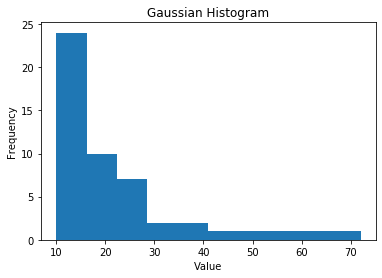

In [171]:
# -- Plot histogram
plt.hist(values[:50])
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
plt.show()

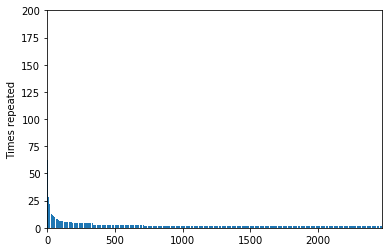

In [172]:
# -- Plot plain
plt.bar(range(len(values[:non_unique])), values[:non_unique], align='center')
plt.ylabel("Times repeated")
plt.axis((0,non_unique,0,200))
plt.show()
